# Possum Regression

## Подключение модулей

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Загрузка данных

In [6]:
df = pd.read_csv("possum.csv", index_col="case")

In [7]:
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Описание признаков:
- case - номер наблюдения
- site - номер места, где был пойман опоссум
- pop - Популяция, как Vic (Виктория), так и ohter (Новый Южный Уэльс или Квинсленд).
- sex - пол, либо m (мужской), либо f (женский)
- age - возраст опоссума
- hdlngth - длина головы, в мм
- skullw - ширина черепа, в мм
- totlngth - общая длина, в см
- taill - длина хвоста, в см
- footlgth - длина ноги
- earconch - длина ушной раковины
- eye - расстояние от медиального канта до латерального канта правого глаза
- chest - окружность груди (в см)
- belly - окружность живота (в см)

## Разведочный анализ данных

In [8]:
df.shape

(104, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 1 to 104
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       102 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  103 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.4+ KB


Имеется 3 пропущенных значения

In [10]:
df.isna().sum()

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.duplicated().sum()

0

Дубликатов в наборе данных нет

In [13]:
df["Pop"].unique()

array(['Vic', 'other'], dtype=object)

Закодируем пол и место обитания
- Pop: Vic - 0, other - 1
- sex f - 0, m - 1

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Pop'] = labelencoder.fit_transform(df['Pop'])
df['sex'] = labelencoder.fit_transform(df['sex'])
df.sample(2)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
23,1,0,0,4.0,92.5,56.1,89.0,36.0,72.8,53.3,15.4,28.0,35.0
19,1,0,0,5.0,94.4,55.4,90.5,35.0,73.4,53.9,15.2,28.0,32.0


In [15]:
df.describe()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.673267,0.574257,0.584158,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,2.366892,0.496921,0.495325,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,0.000000,0.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,1.000000,0.000000,0.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,4.000000,1.000000,1.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,1.000000,1.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,7.000000,1.000000,1.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


## Двумерный анализ признаков

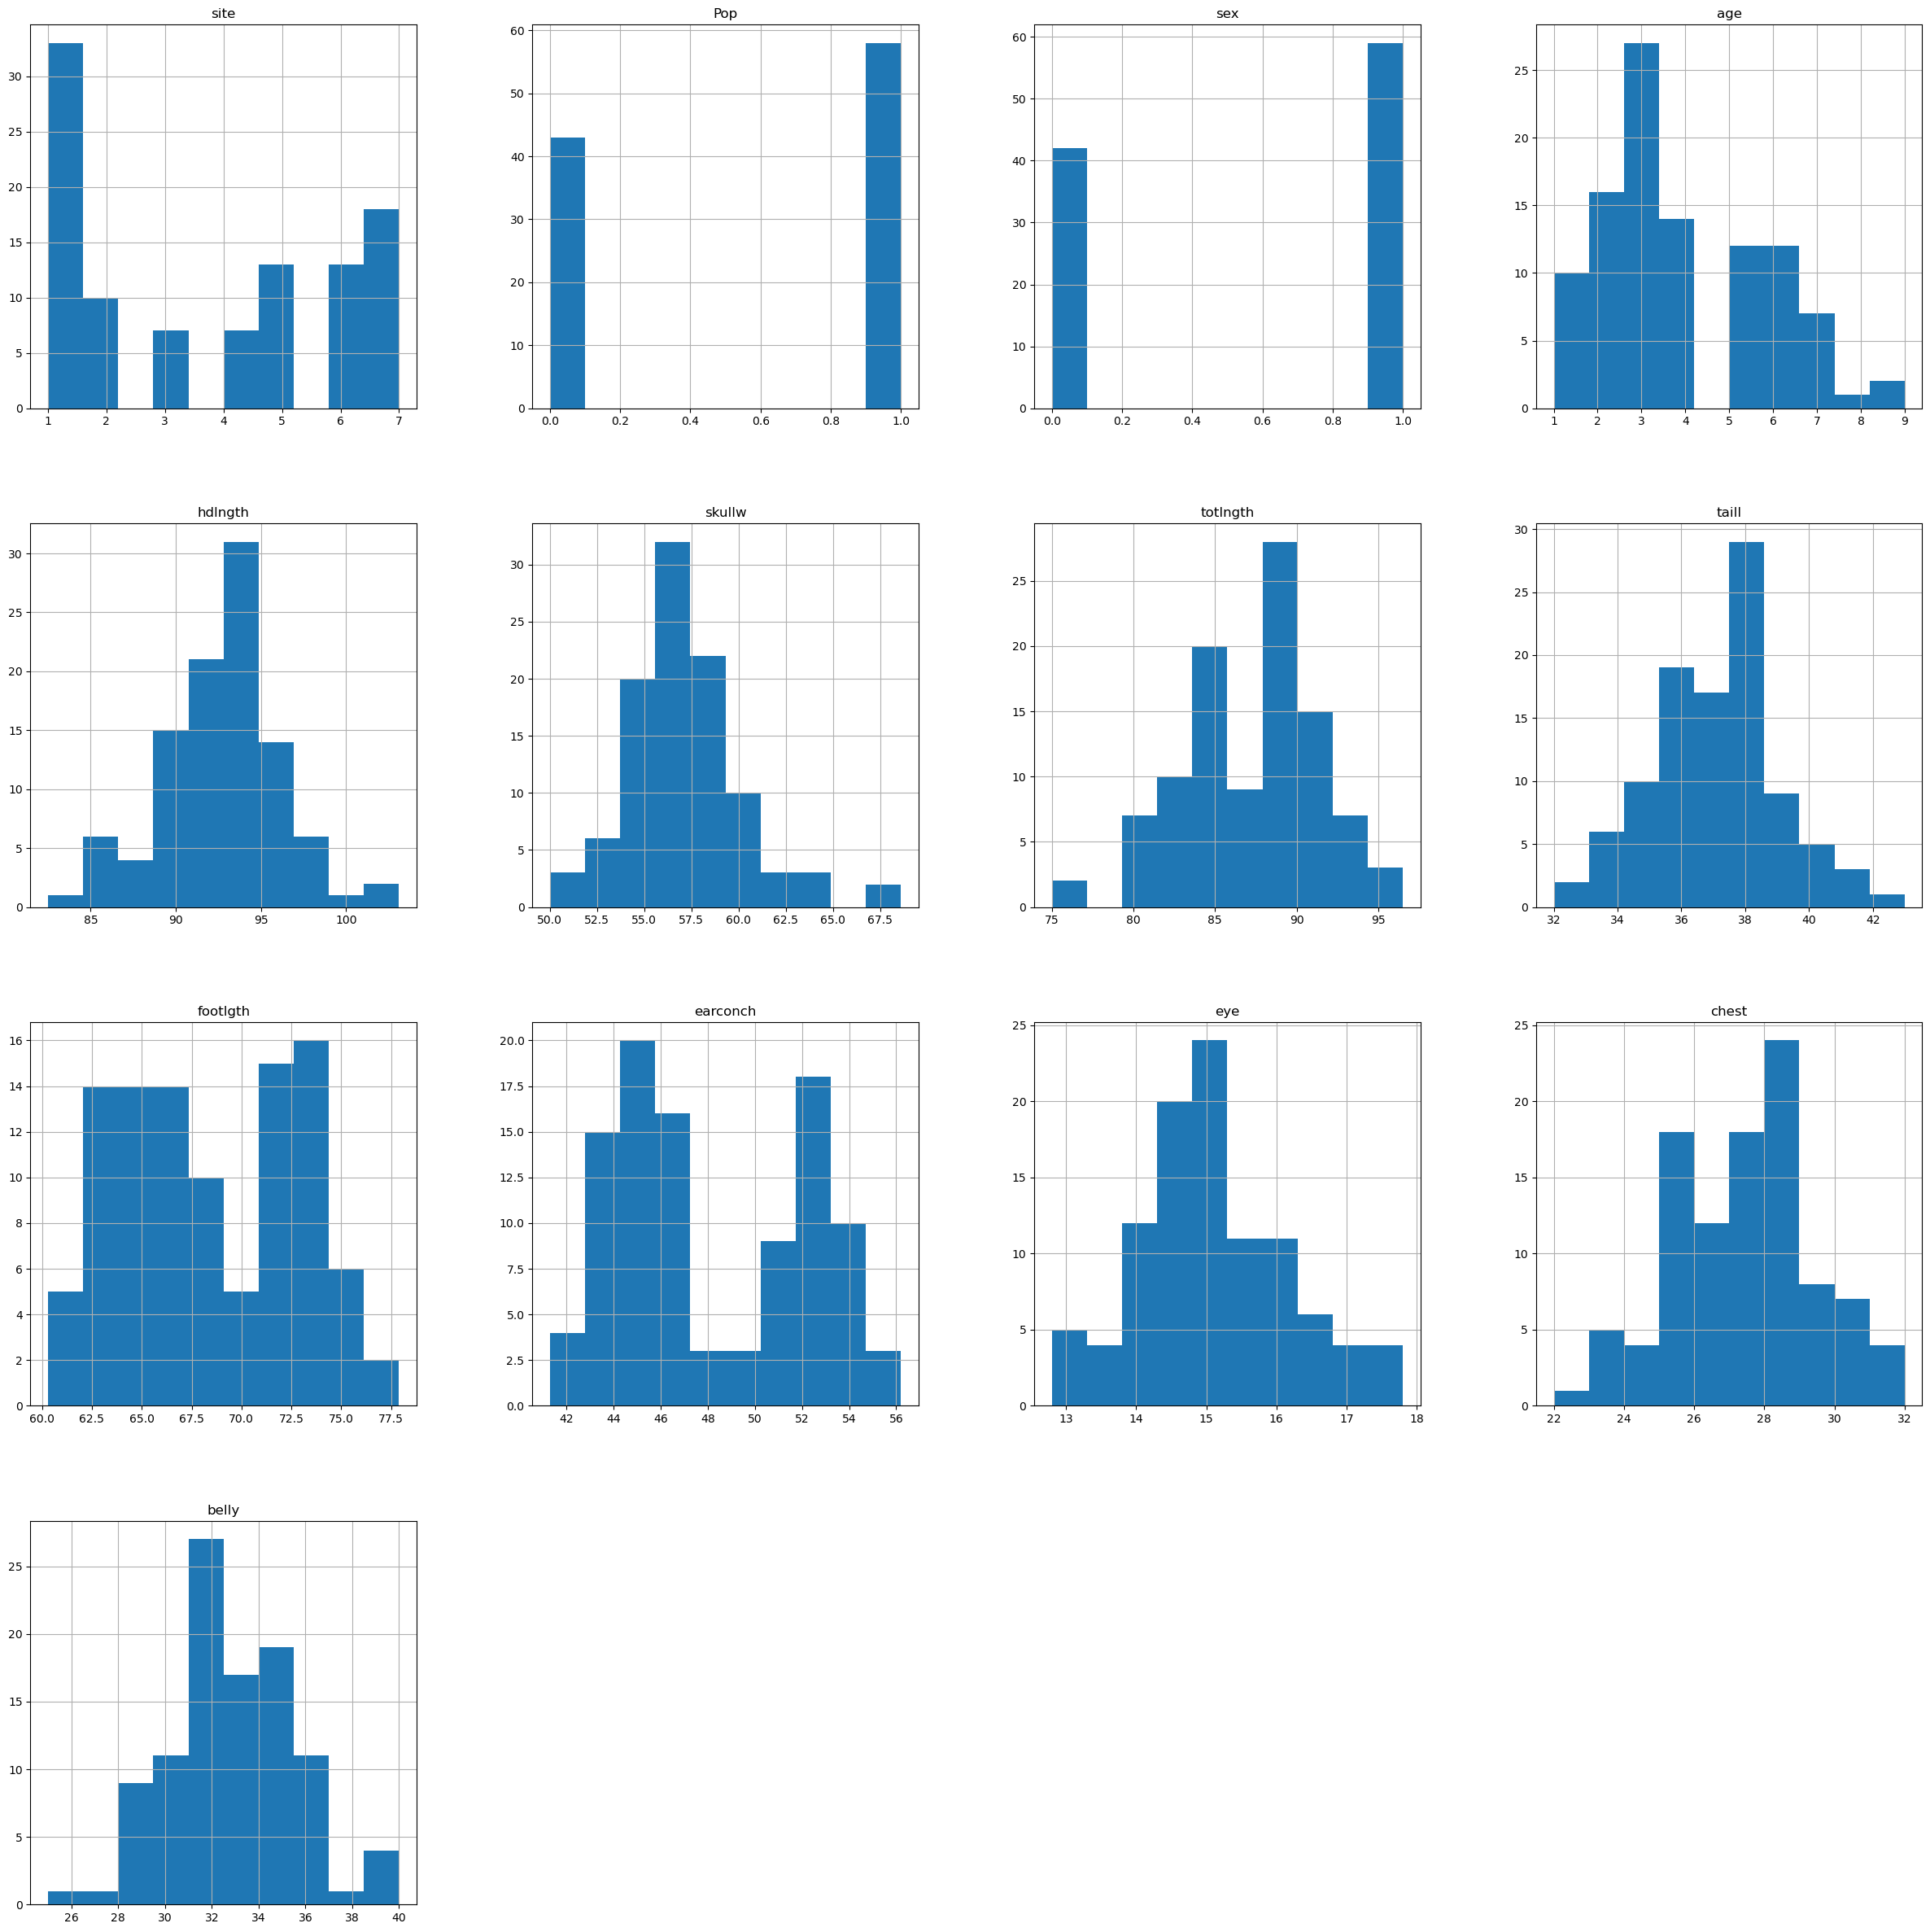

In [16]:
df.hist(figsize=(30, 30));

Распределение только в половине случаев является равномерным

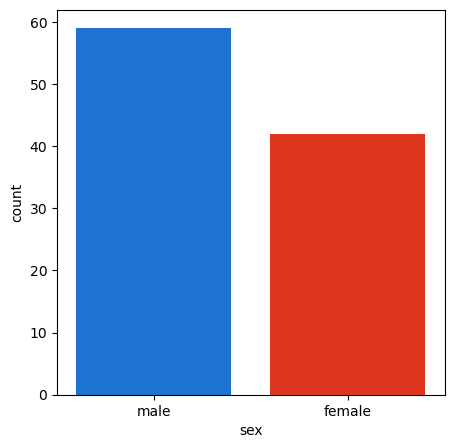

In [17]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df["sex"].replace({0: "female", 1: "male"}), palette=["#0070f0", "#ff1e00"])
plt.show()

оппосумов мужского пола больше чем женского 

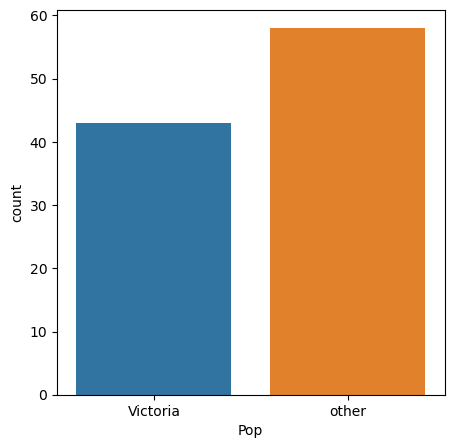

In [18]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df["Pop"].replace({0: "Victoria", 1: "other"}))
plt.show()

Популяция в других местностях больше оппосумов чем в штате Виктории

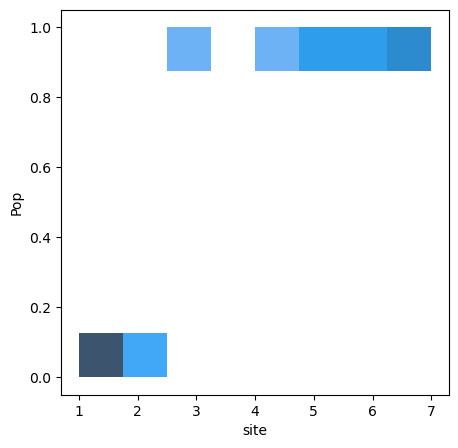

In [19]:
plt.figure(figsize=(5, 5))
sns.histplot(x="site", y="Pop", data=df);
plt.show();

График показывает что в первые два места для поимки  были в  штате Виктория, а остальные в других штатах

In [20]:
df = pd.concat([df, pd.get_dummies(df["site"], prefix='site', dtype=int)], axis = 1)
df.drop("site", axis=1, inplace=True)

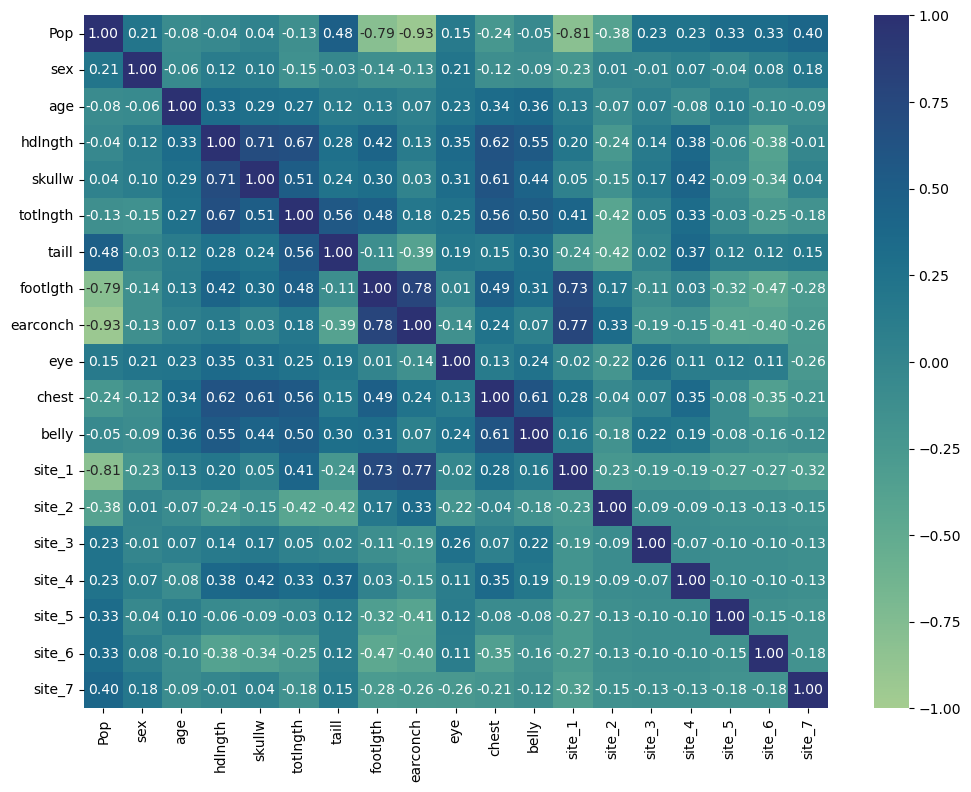

In [21]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap="crest", fmt = '0.2f', vmin=-1)
plt.show()

На тепловой карте множество кореляций как положительных так и отрицательных

## Обучение моделей

In [23]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [24]:
Y = df['age']
X = df.drop('age', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.33, random_state=17)

#### LinearRegression

In [25]:
linear_regression = LinearRegression().fit(X_train, Y_train);
linear_regression_test_predict = linear_regression.predict(X_test)

print('mean_Absolute-Error', mean_absolute_error(Y_test, linear_regression_test_predict))
print('mean-squared-error', mean_squared_error(Y_test, linear_regression_test_predict))
print('r2score', r2_score(Y_test, linear_regression_test_predict))

mean_Absolute-Error 1.6175319492639526
mean-squared-error 4.408666426881364
r2score -0.20768208281394718


In [26]:
weights = linear_regression.coef_
bias = linear_regression.intercept_

print("Веса параметров:", weights)
print("Смещение (bias):", bias)

Веса параметров: [-1.7288972   0.04085761  0.0692797   0.34189474 -0.11065131  0.4424379
 -0.15549581 -0.04225459  0.17315147  0.14070764  0.09564008  0.8463908
  0.8825064  -0.28585845 -2.63746095  0.19449221  0.71580268  0.28412731]
Смещение (bias): -24.852783863986428


In [27]:
import statsmodels.api as sm

model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     1.711
Date:                Fri, 29 Nov 2024   Prob (F-statistic):             0.0754
Time:                        11:27:10   Log-Likelihood:                -123.54
No. Observations:                  67   AIC:                             281.1
Df Residuals:                      50   BIC:                             318.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.3694     10.063     -1.825      0.0

In [28]:
def learn_models(target_name):
    Y = df[target_name]
    X = df.drop(target_name, axis=1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.33, random_state=42)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    predictions_list = []
    
    for name, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        predictions_list.append(predictions)
        
        mae = mean_absolute_error(Y_test, predictions)
        mse = mean_squared_error(Y_test, predictions)
        r2 = r2_score(Y_test, predictions)
        
        r2_scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='r2')
        mean_r2 = r2_scores.mean()
        
        print(name)
        print(f"  Mean Absolute Error (Test): {mae:.4f}")
        print(f"  Mean Squared Error (Test): {mse:.4f}")
        print(f"  R2 Score (Test): {r2:.4f}")
        print(f"  Mean R2 Score (Cross-Validation): {mean_r2:.4f}")
        print("-" * 50)

    return predictions_list

In [29]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42))
]

predictions = learn_models("age")

Linear Regression
  Mean Absolute Error (Test): 1.3649
  Mean Squared Error (Test): 3.5672
  R2 Score (Test): -0.0255
  Mean R2 Score (Cross-Validation): -0.5897
--------------------------------------------------
Decision Tree
  Mean Absolute Error (Test): 1.6765
  Mean Squared Error (Test): 6.2647
  R2 Score (Test): -0.8010
  Mean R2 Score (Cross-Validation): -1.2461
--------------------------------------------------
Random Forest
  Mean Absolute Error (Test): 1.2253
  Mean Squared Error (Test): 2.4409
  R2 Score (Test): 0.2983
  Mean R2 Score (Cross-Validation): -0.0998
--------------------------------------------------
Gradient Boosting
  Mean Absolute Error (Test): 1.2371
  Mean Squared Error (Test): 2.6338
  R2 Score (Test): 0.2428
  Mean R2 Score (Cross-Validation): -0.2880
--------------------------------------------------
XGBoost
  Mean Absolute Error (Test): 1.4150
  Mean Squared Error (Test): 3.0250
  R2 Score (Test): 0.1303
  Mean R2 Score (Cross-Validation): -0.1482
-------

### График LinearRegression

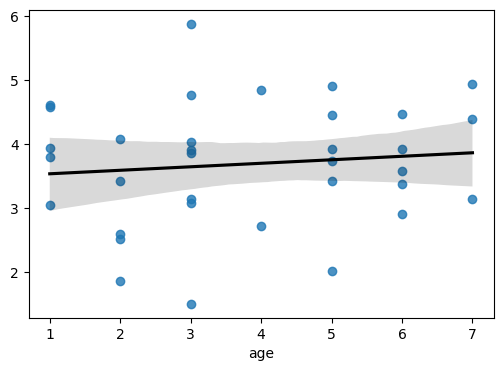

In [30]:
plt.figure(figsize=(6, 4))
sns.regplot(x=Y_test, y=predictions[0], line_kws={"color":"black"});

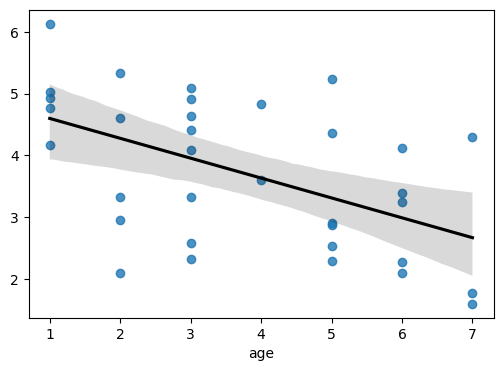

In [31]:
plt.figure(figsize=(6, 4))
sns.regplot(x=Y_test, y=predictions[2], line_kws={"color":"black"});

#### Поменяем целевую пременную на длинну головы

In [32]:
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     1.711
Date:                Fri, 29 Nov 2024   Prob (F-statistic):             0.0754
Time:                        11:27:14   Log-Likelihood:                -123.54
No. Observations:                  67   AIC:                             281.1
Df Residuals:                      50   BIC:                             318.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.3694     10.063     -1.825      0.0

In [33]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42))
]

predictions = learn_models("hdlngth")

Linear Regression
  Mean Absolute Error (Test): 1.5059
  Mean Squared Error (Test): 3.5858
  R2 Score (Test): 0.6696
  Mean R2 Score (Cross-Validation): 0.3642
--------------------------------------------------
Decision Tree
  Mean Absolute Error (Test): 2.3059
  Mean Squared Error (Test): 9.6929
  R2 Score (Test): 0.1068
  Mean R2 Score (Cross-Validation): 0.2684
--------------------------------------------------
Random Forest
  Mean Absolute Error (Test): 1.5138
  Mean Squared Error (Test): 3.8776
  R2 Score (Test): 0.6427
  Mean R2 Score (Cross-Validation): 0.5631
--------------------------------------------------
Gradient Boosting
  Mean Absolute Error (Test): 1.5743
  Mean Squared Error (Test): 4.2649
  R2 Score (Test): 0.6070
  Mean R2 Score (Cross-Validation): 0.4853
--------------------------------------------------
XGBoost
  Mean Absolute Error (Test): 1.5388
  Mean Squared Error (Test): 3.6681
  R2 Score (Test): 0.6620
  Mean R2 Score (Cross-Validation): 0.4416
--------------

### График LinearRegression

In [34]:
Y = df['hdlngth']
X = df.drop('hdlngth', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.33, random_state=17)

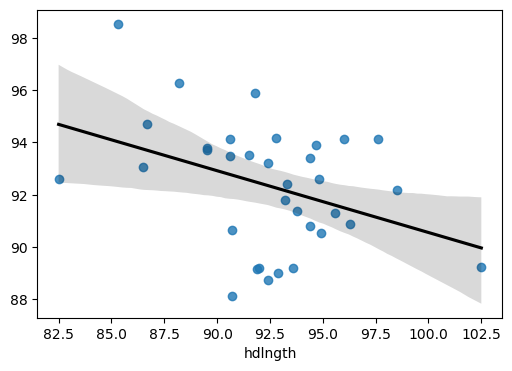

In [35]:
plt.figure(figsize=(6, 4))
sns.regplot(x=Y_test, y=predictions[0], line_kws={"color":"black"});

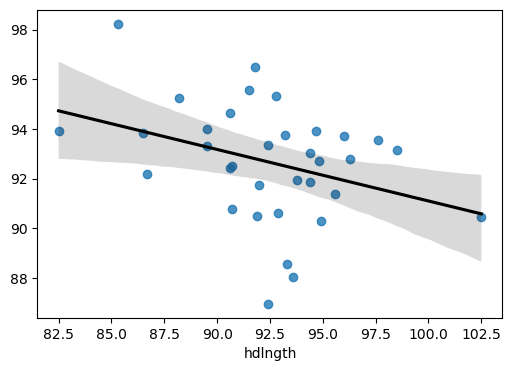

In [36]:
plt.figure(figsize=(6, 4))
sns.regplot(x=Y_test, y=predictions[2], line_kws={"color":"black"});

## Используем SMOGN для добавления синтетических данных

In [44]:
import smogn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = df.copy()
data = data.dropna()
data = data.reset_index(drop=True)

original_X = data.drop(columns=['hdlngth'])
original_y = data['hdlngth']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    original_X, original_y, test_size=0.33, random_state=42
)

train_data = X_train_orig.copy()
train_data['hdlngth'] = y_train_orig

train_data = train_data.reset_index(drop=True)
smogn_data = smogn.smoter(train_data, y='hdlngth')

X_resampled = smogn_data.drop(columns=['hdlngth'])
y_resampled = smogn_data['hdlngth']

model = DecisionTreeRegressor(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred_orig = model.predict(X_test_orig)

mae = mean_absolute_error(y_test_orig, y_pred_orig)
mse = mean_squared_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print("Размер данных до:", X_train_orig.shape)
print("Размер данных после:", X_resampled.shape)

print(f"Тестирование на исходных данных:")
print(f"Mean Absolute Error (Test): {mae:.4f}")
print(f"Mean Squared Error (Test): {mse:.4f}")
print(f"R2 Score (Test): {r2:.4f}")

r_index: 100%|##########################################################################| 1/1 [00:00<00:00, 249.78it/s]


Размер данных до: (74, 18)
Размер данных после: (62, 18)
Тестирование на исходных данных:
Mean Absolute Error (Test): 5.3974
Mean Squared Error (Test): 204.3181
R2 Score (Test): -0.5848


Видно, что точность значительно повысилась.
Попробуем обучить модели, на этих данных.


In [45]:
df = smogn_data.copy()

In [46]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42))
]

predictions = learn_models("hdlngth")

Linear Regression
  Mean Absolute Error (Test): 6.3004
  Mean Squared Error (Test): 106.8829
  R2 Score (Test): 0.4022
  Mean R2 Score (Cross-Validation): -2.8750
--------------------------------------------------
Decision Tree
  Mean Absolute Error (Test): 0.7745
  Mean Squared Error (Test): 2.4100
  R2 Score (Test): 0.9865
  Mean R2 Score (Cross-Validation): -0.9598
--------------------------------------------------
Random Forest
  Mean Absolute Error (Test): 3.9936
  Mean Squared Error (Test): 68.8435
  R2 Score (Test): 0.6150
  Mean R2 Score (Cross-Validation): -0.1750
--------------------------------------------------
Gradient Boosting
  Mean Absolute Error (Test): 0.6587
  Mean Squared Error (Test): 1.4269
  R2 Score (Test): 0.9920
  Mean R2 Score (Cross-Validation): 0.0749
--------------------------------------------------
XGBoost
  Mean Absolute Error (Test): 3.1177
  Mean Squared Error (Test): 127.5292
  R2 Score (Test): 0.2868
  Mean R2 Score (Cross-Validation): -3.4770
-----

## Вывод

В набора данных очень мало записей, из за этого точнось модели сильно зависит колеблится и от случая, особенно сильно это проявляется на моделях, предсказывающих возраст опосссумов. Связанно это с тем, что признаки практически не влияют на предсказание целевой переменной age. Это можно понять по высоким значениям "P" в OLS Regression Results.
Так же пользы не приносит и мультиколлинеарность, которая возникает из за высокой корреляции признаков

Нормализация, как и стандартизация немного понижают точность лучших моделей (Random Forest и Gradient Boosting), для обучения моделей они не использовались

Добавление нелинейных признакок, взаимодействующих между ключевыми признаками (feature engineering) не принесли результатов. 

Синтетическое увеличение данных (такие как добавление шума или SMOGN) ухудшело предсказание данных.